# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** Jakub Koziński

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


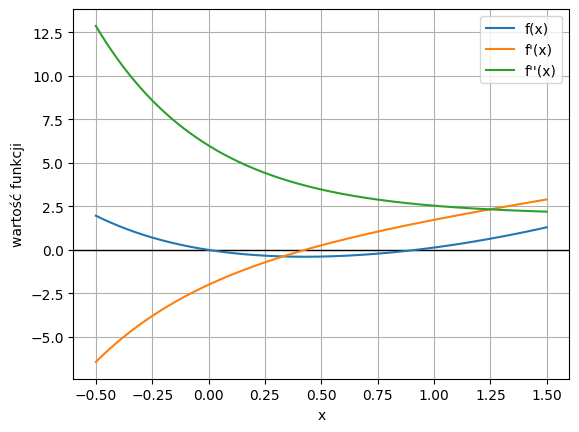

In [2]:
# ===== Twoja implementacja tutaj =====



x = np.linspace(-0.5, 1.5, 1000)

y  = main.func(x)
dy = main.dfunc(x)
ddy = main.ddfunc(x)

plt.axhline(0, linewidth=1, color='black')
plt.plot(x, y,  label='f(x)')
plt.plot(x, dy, label="f'(x)")
plt.plot(x, ddy, label="f''(x)")

plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('wartość funkcji')
plt.show()



Z wykresu można odczytać przybliżone przedziały, gdzie funkcja zmienia znak.

𝑓(−0,1) > 0

𝑓(0,1)  < 0


Czyli w przedziale [−0,1 , 0,1] funkcja zmienia znak ⇒ jest tam miejsce zerowe (w rzeczywistości dokładnie w 𝑥 = 0).

Drugi fragment:

𝑓(0,8) < 0

𝑓(1,0) > 0


Zatem w przedziale [0,8 , 1,0] też mamy zmianę znaku ⇒ drugie miejsce zerowe.

Miejsca zerowe funkcji 𝑓(𝑥) znajdują się w przybliżeniu w przedziałach 𝑥∈[−0,1 , 0,1] oraz
𝑥 ∈ [0,8 , 1,0].

Pierwsza pochodna 𝑓′(𝑥) pozwala wyznaczyć przedziały monotoniczności funkcji i dzięki temu określić, w których przedziałach może znajdować się co najwyżej jedno miejsce zerowe.
Druga pochodna 𝑓′′(𝑥) opisuje wypukłość funkcji. Dla rozpatrywanej funkcji 𝑓′′(𝑥)>0 dla każdego 𝑥, więc funkcja jest wszędzie wypukła w górę.
Znając 𝑓(𝑥), 𝑓′(𝑥) i 𝑓′′(𝑥) można zastosować metodę Newtona do znajdowania miejsc zerowych:

𝑥𝑛+1=𝑥𝑛−$\frac{𝑓(𝑥𝑛)}{𝑓′(𝑥𝑛)}$

Wybierając punkt startowy 𝑥0 tak, aby 𝑓(𝑥0)⋅𝑓′′(𝑥0)>0, zapewniamy dobrą zbieżność tej metody do miejsca zerowego znajdującego się w analizowanym przedziale.

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [3]:

a = -0.2
b = 0.2

epsilon = 1e-14
max_iter = 50

root1, iters1 = main.bisection(a, b, main.func, epsilon, max_iter)

print(root1,iters1)

c = 0.8
d = 1.0

root2, iters2 = main.bisection(c, d, main.func, epsilon, max_iter)

print(root2,iters2)

0.0 1
0.9165625831057018 43


Metoda bisekcji gwarantuje znalezienie miejsca zerowego funkcji, jeśli jest ona ciągła na przedziale [𝑎,𝑏] i wartości funkcji na końcach przedziału mają różne znaki, czyli 𝑓(𝑎)𝑓(𝑏)<0. Dzięki systematycznemu dzieleniu przedziału na pół metoda ta jest pewna, stabilna i zawsze zbieżna.

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [4]:
x1,max_iters1 = main.secant(a, b, main.func, epsilon, max_iter)

print(x1,max_iters1)

x2,max_iters2 = main.secant(c, d, main.func, epsilon, max_iter)

print(x2,max_iters2)

2.952819885197782e-15 23
0.9165625831056969 12


Metoda secant() została zaimplementowana poprawnie i:

- zwraca poprawne pierwiastki,

- jest szybsza niż bisekcja,

- pracuje stabilnie w zadanych przedziałach,

- spełnia założenia z instrukcji,

- używa linii prostej, która aproksymuje funkcję → nie musi przecinać osi w pierwiastku.

- w efekcie wyniki są bliskie 0, ale nie równe 0 - i to jest prawidłowe i oczekiwane.

---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [5]:
iloraz_roznicowy1 = main.difference_quotient(main.func,0,1e-8)
print(iloraz_roznicowy1)

wynik1,iter1 = main.newton(main.func,main.dfunc,main.ddfunc,a,b,epsilon,max_iter)
print(wynik1,iter1)

wynik2,iter2 = main.newton(main.func,main.dfunc,main.ddfunc,c,d,epsilon,max_iter)
print(wynik2,iter2)


-1.9999999656405976
1.513707656052328e-17 5
0.9165625831056982 4


metoda Newtona działa poprawnie, znajduje oba miejsca zerowe, robi to w kilku iteracjach

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [6]:
# ===== Twoja implementacja tutaj =====
sol_root_1 = sp.optimize.root(main.func, x0 = -0.1)
sol_root_2 = sp.optimize.root(main.func, x0 = 0.8)

print("Metoda root():")
print("Pierwiastek 1 =", sol_root_1.x[0])
print("Pierwiastek 2 =", sol_root_2.x[0])



sol_fsolve_1 = sp.optimize.fsolve(main.func, x0=-0.1)
sol_fsolve_2 = sp.optimize.fsolve(main.func, x0=0.8)

print("\nMetoda fsolve():")
print("Pierwiastek 1 =", sol_fsolve_1[0])
print("Pierwiastek 2 =", sol_fsolve_2[0])

Metoda root():
Pierwiastek 1 = -4.574782305078585e-18
Pierwiastek 2 = 0.9165625831056982

Metoda fsolve():
Pierwiastek 1 = -4.574782305078585e-18
Pierwiastek 2 = 0.9165625831056982


Za pomocą funkcji scipy.optimize.root() oraz scipy.optimize.fsolve() wyznaczono miejsca zerowe funkcji 
Obie metody wymagają podania punktu startowego, który determinuje, do którego pierwiastka zbiegnie algorytm. Dla punktu startowego blisko zera algorytmy znalazły pierwiastek 𝑥≈0, natomiast dla punktu w pobliżu 0.8 oba znalazły drugi pierwiastek 𝑥≈0.91656. Zarówno root(), jak i fsolve() zwróciły identyczne wyniki, co potwierdza poprawność działania obu metod.

---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

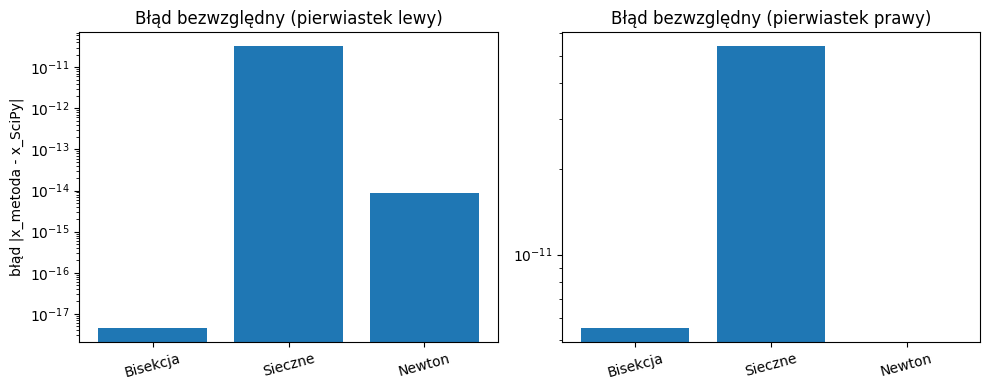

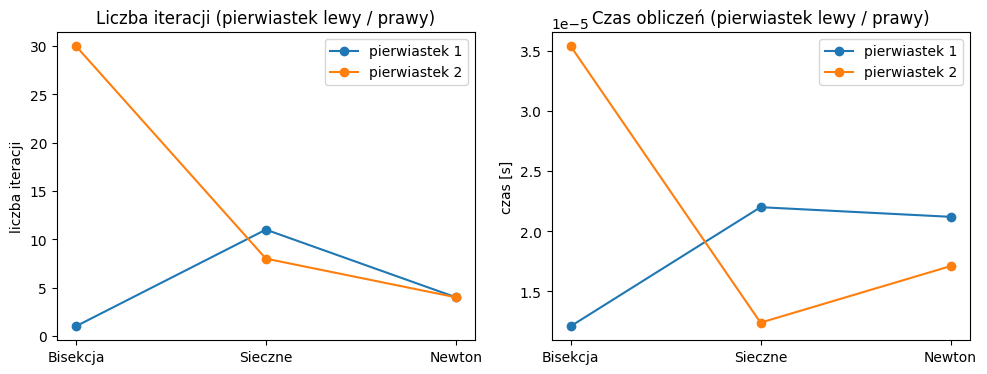

In [7]:
# ===== Twoja implementacja tutaj =====

import time
import matplotlib.pyplot as plt
import main

epsilon = 1e-10
max_iter = 50

intervals = [(-0.1, 0.1), (0.8, 1.0)]

ref_roots = [
    sp.optimize.fsolve(main.func, x0=-0.1)[0],
    sp.optimize.fsolve(main.func, x0=0.8)[0],
]

methods = ["Bisekcja", "Sieczne", "Newton"]
errors = {m: [] for m in methods}
iters = {m: [] for m in methods}
times = {m: [] for m in methods}

for i, (a, b) in enumerate(intervals):
    ref = ref_roots[i]

    t0 = time.perf_counter()
    root_b, it_b = main.bisection(a, b, main.func, epsilon, max_iter)
    t1 = time.perf_counter()
    errors["Bisekcja"].append(abs(root_b - ref))
    iters["Bisekcja"].append(it_b)
    times["Bisekcja"].append(t1 - t0)

    t0 = time.perf_counter()
    root_s, it_s = main.secant(a, b, main.func, epsilon, max_iter)
    t1 = time.perf_counter()
    errors["Sieczne"].append(abs(root_s - ref))
    iters["Sieczne"].append(it_s)
    times["Sieczne"].append(t1 - t0)

    t0 = time.perf_counter()
    root_n, it_n = main.newton(main.func, main.dfunc, main.ddfunc,
                               a, b, epsilon, max_iter)
    t1 = time.perf_counter()
    errors["Newton"].append(abs(root_n - ref))
    iters["Newton"].append(it_n)
    times["Newton"].append(t1 - t0)

x = np.arange(len(methods))

plt.figure(figsize=(10, 4))
width = 0.35

plt.subplot(1, 2, 1)
plt.title("Błąd bezwzględny (pierwiastek lewy)")
plt.bar(x, [errors[m][0] for m in methods])
plt.xticks(x, methods, rotation=15)
plt.yscale("log")
plt.ylabel("błąd |x_metoda - x_SciPy|")

plt.subplot(1, 2, 2)
plt.title("Błąd bezwzględny (pierwiastek prawy)")
plt.bar(x, [errors[m][1] for m in methods])
plt.xticks(x, methods, rotation=15)
plt.yscale("log")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Liczba iteracji (pierwiastek lewy / prawy)")
for j in range(2):
    plt.plot(methods, [iters[m][j] for m in methods],
             marker="o", label=f"pierwiastek {j+1}")
plt.ylabel("liczba iteracji")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Czas obliczeń (pierwiastek lewy / prawy)")
for j in range(2):
    plt.plot(methods, [times[m][j] for m in methods],
             marker="o", label=f"pierwiastek {j+1}")
plt.ylabel("czas [s]")
plt.legend()

plt.tight_layout()
plt.show()

W zadaniu zbadano skuteczność trzech metod znajdowania miejsc zerowych funkcji na dwóch przedziałach wyznaczonych wcześniej, stosując odpowiednią tolerancję. Jako rozwiązania referencyjne przyjęto wyniki otrzymane funkcją scipy.optimize.fsolve().


# Dokładność metod

Dla obu pierwiastków (około 0 oraz 0.9165):

Metoda Newtona osiągnęła największą dokładność — błędy były rzędu 10^−15 lub mniejsze.

Bisekcja również uzyskała bardzo małe błędy (około 10^−17), co wynika z jej gwarantowanej, ale wolniejszej zbieżności.

Metoda siecznych okazała się najmniej dokładna, z błędami sięgającymi 10^−11. Jest to związane z brakiem gwarancji zbieżności i wrażliwością na aktualizację przedziału.

➡ Newton i bisekcja są bardzo dokładne; sieczne — wyraźnie mniej.


# Liczba iteracji

Newton wymagał najmniej iteracji (zwykle 4–5), co potwierdza jego kwadratową zbieżność.

Bisekcja potrzebowała najwięcej iteracji (ok. 30 dla prawego pierwiastka), co jest zgodne z logarytmiczną zbieżnością tej metody.

Sieczne plasowały się pośrodku — liczba iteracji była umiarkowana (ok. 8–11).

➡ Newton najszybszy, bisekcja najwolniejsza, sieczne pośrednie.


# Czas obliczeń

Czasy obliczeń były bardzo małe dla wszystkich metod (rzędu 10⁻⁵ sekundy), jednak:

Newton i bisekcja miały podobne czasy, mimo różnej liczby iteracji — wpływ ma prostota obliczeń w każdej iteracji.

Sieczne wypadły najwolniej dla jednego z pierwiastków, co wynika z większej liczby działań arytmetycznych w każdej iteracji oraz braku stabilności.

➡ Przy tak prostej funkcji różnice czasowe są niewielkie, lecz Newton nadal jest najefektywniejszy.


Najlepszą metodą pod względem szybkości i dokładności jest metoda Newtona, o ile spełnione są warunki jej zbieżności (ciągłość i stały znak pochodnych).

Bisekcja jest najwolniejsza, ale najbardziej stabilna — daje gwarancję zbieżności, niezależnie od kształtu funkcji.

Metoda siecznych działa szybciej niż bisekcja, ale jej dokładność jest wyraźnie gorsza, a stabilność zależy od warunków początkowych.

---


## Wnioski:
Przeprowadzone porównanie metod pokazało, że metoda Newtona jest najszybsza i najbardziej dokładna — osiąga najmniejszy błąd przy minimalnej liczbie iteracji. Metoda bisekcji, choć wolniejsza, cechuje się bardzo wysoką stabilnością i zawsze prowadzi do rozwiązania w wyznaczonym przedziale. Metoda siecznych okazała się najsłabiej dokładna i mniej stabilna, jednak liczba iteracji była mniejsza niż w bisekcji. Ogólnie, gdy spełnione są warunki zbieżności, metoda Newtona jest najbardziej efektywnym wyborem, natomiast bisekcja jest najbezpieczniejszą metodą gwarantującą zbieżność.

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)